Source of the dataset :** The dataset was obtained from the UCI Machine Learning Repository.
Dataset link: https://archive.ics.uci.edu/static/public/2/adult.z

Objective of the Dataset: The goal of the dataset is to predict wether a person earns more than $50,000 per year based on various demographic and employment-related characteristics.
It is a binary classification problem.

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("adult.csv")
no_of_rows,no_of_columms=df.shape
print(f"Rows: {no_of_rows}\nColumms: {no_of_columms}")# shape is used for getting the rows and colummns of the data 


Rows: 32561
Columms: 15


In [11]:
#Exploratory Data Analysis
#a) Display the first five rows and last five rows of the dataset
first_rows=df.head(5)# head() is used for obtaining the first five rows of the dataset
print(first_rows)
print("="*100)
last_rows=df.tail(5)# tail() is used for obtaining the last five rows of the dataset
print(last_rows)


   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

In [ ]:
print("missing value in each column:")
print(df.isnull().sum()) # use for obtaing the missing values in a dataset

missing value in each column:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [ ]:
# C) Summary Statics, Shape, data Types qnd null values
# shape
print("Dataset shape: ",df.shape)
print("="*60)

# Data Types
print("data types: ",df.dtypes)
print("="*60)

#summary Statics
print("Summary Statics: \n",df.describe(include='all'))
print("="*60)


Dataset shape:  (32561, 15)
data types:  age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object
Summary Statics: 
                  age workclass        fnlwgt education  education.num  \
count   32561.000000     30725  3.256100e+04     32561   32561.000000   
unique           NaN         8           NaN        16            NaN   
top              NaN   Private           NaN   HS-grad            NaN   
freq             NaN     22696           NaN     10501            NaN   
mean       38.581647       NaN  1.897784e+05       NaN      10.080679   
std        13.640433       NaN  1.055500e+05       NaN       2.572720   
min        17.000000       NaN  1.228500

In [34]:
#Null values
print("Null vlaues per column \n",df.isnull().sum())

Null vlaues per column 
 age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


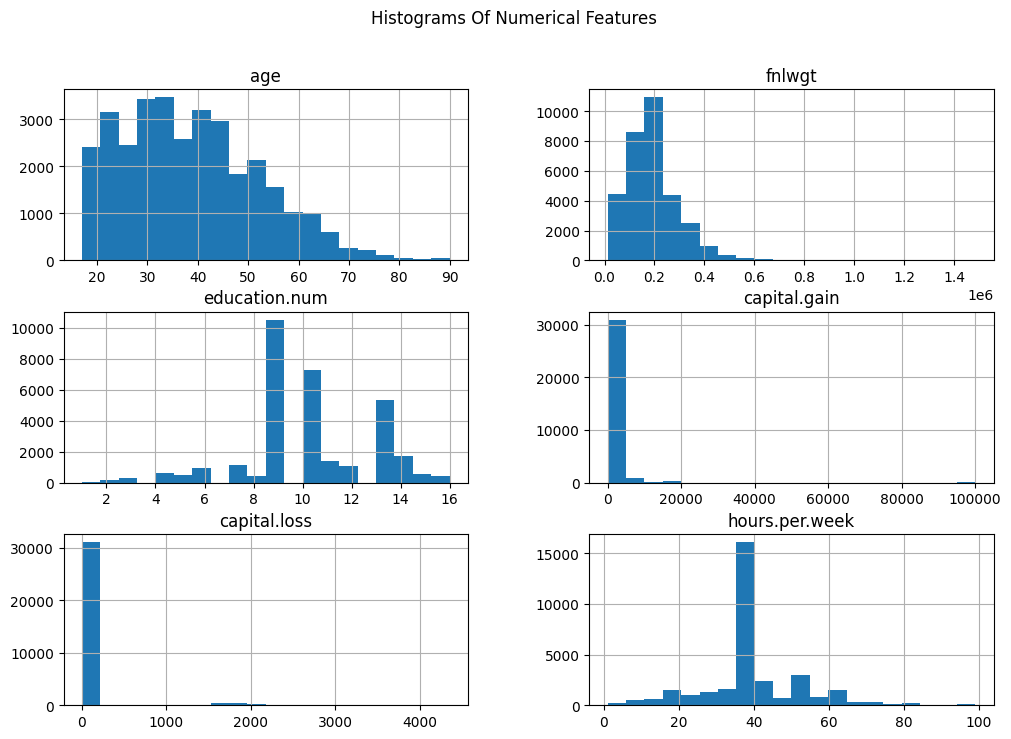

In [38]:
# D) Visualize the dataset using charts
#imoprting the libraries 
import matplotlib.pyplot as plt
import seaborn as sns

# histogram For numerical Columns
df.select_dtypes(include='number').hist(figsize=(12,8),bins=20)
plt.suptitle("Histograms Of Numerical Features")
plt.show()

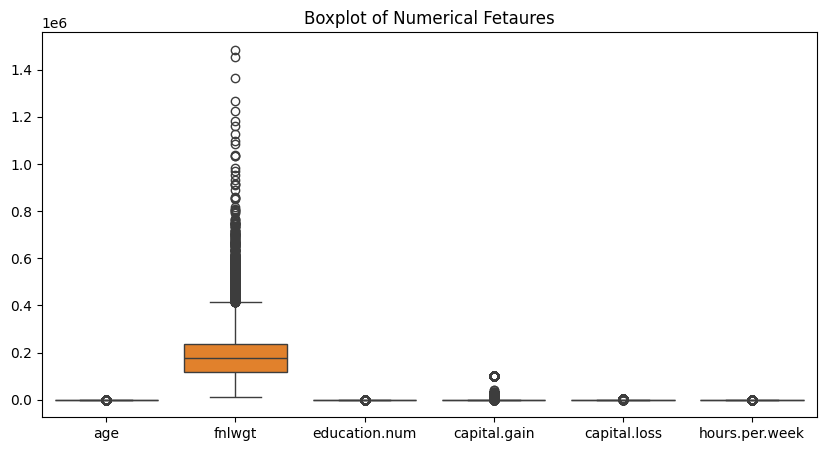

In [40]:
# Boxplot for outliers

plt.figure(figsize=(10,5))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title("Boxplot of Numerical Fetaures")
plt.show()

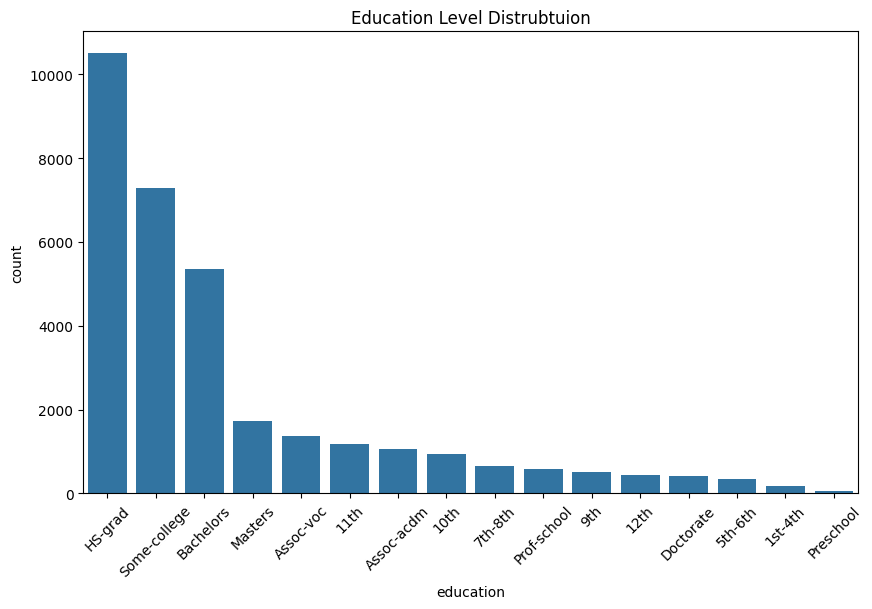

In [42]:
#Bar chart for a categorical column
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Education Level Distrubtuion")
plt.show()

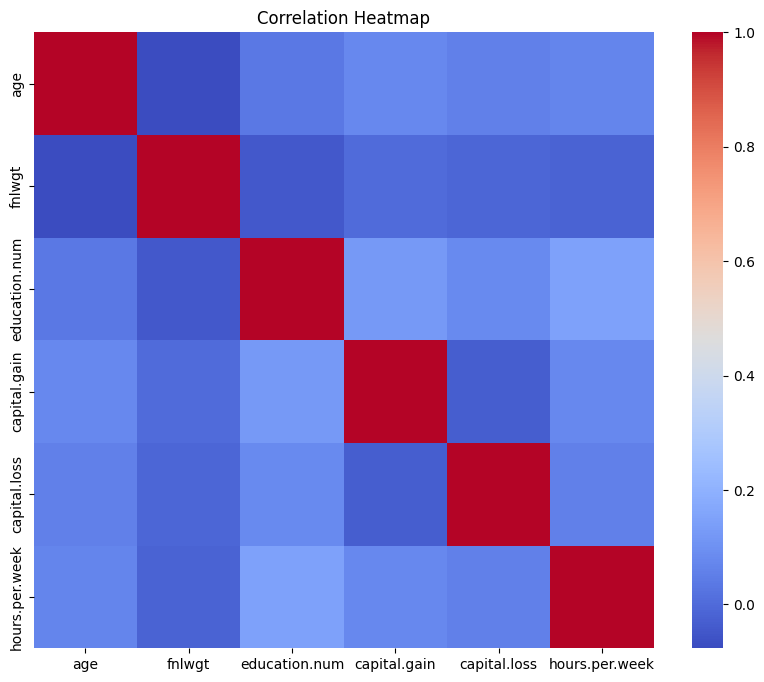

In [43]:
# HeatMap for correlation:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [53]:
# 4) Handle Missing Value
# a.) Which column have missing data
print(df.isnull().sum())

# b)How did you handle the missing value
'''We applied mode imputation which is suitable for categorical variables 
We replaced " ?" with Nan so that pandas can recognize them as missing
We then filled missing vlaues in all 3 affected colummns using the most frequent(mode) value from each column
This approach helps to retain all records in the datasets while ensuring data completeness.'''

df.replace(" ?", pd.NA,inplace=True)
df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace=True)
df['native.country'].fillna(df['native.country'].mode()[0],inplace=True)
print("="*100)
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


C:\Users\ankus\AppData\Local\Temp\ipykernel_17236\1371253745.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(df['workclass'].mode()[0],inplace=True)
C:\Users\ankus\AppData\Local\Temp\ipykernel_17236\1371253745.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [61]:
# Perform Feature Encoding  
'''We have to convert categorical columns into numerical form using 
Label encoding: For ordinal categories or model types that accept labels
One Hot encoding: For nominal (unordered)categories when using models like logistic Regression , Random Forest'''

# a) Identify the categorical columns
# Import the necessary library librariews 

import pandas as pd 
from sklearn.preprocessing import LabelEncoder 

# step 1) Identify all the categorical columns

categorical_columns=df.select_dtypes(include='object').columns 
print("Categorical  Columns: \n",categorical_columns)

'''Step 2) Label Encode the target column ('income') 
        The Target column 'income' contains lables like '<=50K'and '>50K'
        we convert it to numeric labels: <=50k `n 0, >50 K`n 1'''
le=LabelEncoder()
df['income']=le.fit_transform(df['income']) # transforms the targeted column

'''Step 3) One- hot Encode all other categorical input features
        One hot creates  seperate binary columns for each category 
        drop first =True is used to avid the dummy variable trap (removes first category)'''
df_encoded=pd.get_dummies(df,columns=[col for col in categorical_columns if col!='income'],drop_first=True)

'''Step 4) Check the result 
     (   Display new shape and preview the encoded dataframe '''
print("="*100)
print("Encoded dataset preview: \n")
print(df_encoded.head())


Categorical  Columns: 
 Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')
Encoded dataset preview: 

   age  fnlwgt  education.num  capital.gain  capital.loss  hours.per.week  \
0   90   77053              9             0          4356              40   
1   82  132870              9             0          4356              18   
2   66  186061             10             0          4356              40   
3   54  140359              4             0          3900              40   
4   41  264663             10             0          3900              40   

   income  workclass_Local-gov  workclass_Never-worked  workclass_Private  \
0       0                False                   False               True   
1       0                False                   False               True   
2       0                False                   False               True   
3       0                False    

Numerical columns to be scaled:
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


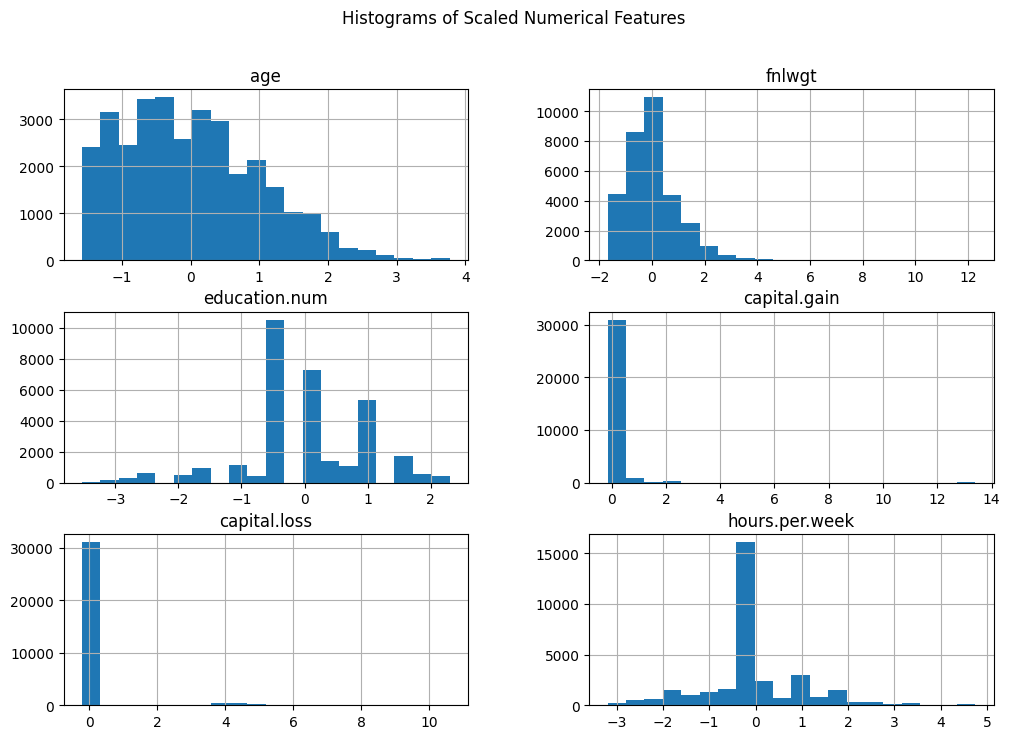

In [64]:
# 6) Perform Feature Scaling
#  a. Identify the numerical columns
# Select columns with numeric data types (int or float)
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column 'income' from scaling (it should not be scaled)
numerical_cols.remove('income')

print("Numerical columns to be scaled:")
print(numerical_cols)

print("="*100)

# b. Apply StandardScaler or MinMaxScaler

from sklearn.preprocessing import StandardScaler # importing the library
import matplotlib.pyplot as plt
import seaborn as sns
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
# Plot histograms of scaled numerical columns
df_encoded[numerical_cols].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Scaled Numerical Features")
plt.show()




In [65]:
#7) Perform Train-Test Split
# Import the function
from sklearn.model_selection import train_test_split

# Define feature matrix X and target vector y
X = df_encoded.drop('income', axis=1)  # Input features
y = df_encoded['income']               # Target variable

#  Perform the split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state for reproducibility
)

#  Show the shapes to confirm
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (26048, 97)
Shape of X_test: (6513, 97)
Shape of y_train: (26048,)
Shape of y_test: (6513,)


In [ ]:
'''8 )We use the random forest Classifier Because 
It hadles both the categorical and numerical features well after encoding
It performs well with the imbalanced data and is less sensitive to scaling
It is robust , handles noise well and usually gives good results with less tuning of parameters'''

# Train the model and display accurancy score
# Step 1) Import the classifier and metrices
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Step 2) : Initalize and train the model
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)
# Step 3) Make predictions on the test set
y_pred=model.predict(X_test)
# Step 4) Evaluate the model performance
print("Accuracy:",accuracy_score(y_test,y_pred))


print("="*100)
# Confusion Matrix 
cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)






Accuracy: 0.8513741747274681
Confusion Matrix:
 [[4607  369]
 [ 599  938]]
